## frequent topic ~ continent/country

In [1]:
import pandas as pd 
import numpy as np
import json 
import matplotlib.pyplot as plt

In [2]:
file_fp = "/home/linyu.linyu/health.research/health/data/cls_output/filter_data/data_country.csv"
data = pd.read_csv(file_fp)
data.head()
## doc_id -> continent

,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,word,country_predicted,country_conf,continent,income
0,Massachusetts,42.36565,-71.10832,USA,6254926,Massachusetts,A,ADM1,0,Massachusetts,USA,0.946707,NaN,High income
1,Louisiana,29.95465,-90.07507,USA,4335045,New Orleans,P,PPLA2,4,New Orleans,USA,0.957188,NaN,High income
2,Fukushima,37.38158,140.22199,JPN,2112922,Fukushima-ken,A,ADM1,5,Fukushima,JPN,0.948191,AS,High income
3,NaN,36.00000,138.00000,JPN,1862185,Honshū Island,T,ISL,6,Honshu,JPN,0.895296,AS,High income
4,Fukushima,37.38158,140.22199,JPN,2112922,Fukushima-ken,A,ADM1,11,Fukushima,JPN,0.951695,AS,High income


In [3]:
folder = "/home/linyu.linyu/health.research/health/data/cls_output/topic_out/"
topic_scores = json.loads( open( folder + "/topic40_output.json", "r").read() )
topic_scores.keys()

## doc -> topic_id

dict_keys(['rel_topic_preference_score', 'topic_key_words', 'topic_preference_score', 'doc2topic', 'word_dic', 'topic2words', 'topic_word_weights'])

In [4]:
topic_names = pd.read_csv( folder + "/topic_models.csv" )
topic_names['Topic_idx'] = topic_names['Topic_prevalence'].apply( lambda x: int( x.strip().split(" ")[1] ) )
topic_names['Aggregated_meta_topic'] = topic_names['Aggregated_meta_topic'].apply( lambda x: x.strip())
## topic_id 2 names

topic_idx2name = dict()
topic_idx2agg_name = dict()
topic_idx2metaname = dict()
for i in range(len(topic_names)):
    topic_idx2name[topic_names['Topic_idx'].iloc[i]] = topic_names['Topic_name'].iloc[i].strip()
    topic_idx2agg_name[topic_names['Topic_idx'].iloc[i]] = topic_names['Aggregated_topic'].iloc[i].strip()
    topic_idx2metaname[topic_names['Topic_idx'].iloc[i]] = topic_names['Aggregated_meta_topic'].iloc[i].strip()
topic_names.head()


,Unnamed: 0,Aggregated_meta_topic,Aggregated_topic,Topic_name,Top_3_stemmed_keywords,Topic_prevalence,Topic_idx,Prevalence_score
0,0,Natural disasters,Natural disaster,Natural disaster,"disaster, natural, review",topic 23,23,1.781540
1,1,Natural disasters,Heat waves,Heat waves,"heat, wave, temperature",topic 2,2,0.781942
2,2,Natural disasters,Earthquake,Nepal and Aquila earthquake,"earthquake, nepal, aquila",topic 10,10,1.665045
3,3,Natural disasters,Nuclear disaster,Fukushima nuclear disaster,"fukushima, evacuation, nuclear",topic 15,15,0.897653
4,4,Natural disasters,Tsunami,Japan tsunami,"tsunami, Japan, east",topic 8,8,1.396157


In [5]:
continent_topic_count = { cont: [0] * 40 for cont in data['continent'].unique()}
doc2topic = np.array( topic_scores['doc2topic'] )
doc2max_topic = np.argmax(doc2topic, axis=1)

for i in range(len(data)):
    cont = data['continent'].iloc[i]
    doc_id = data['doc_id'].iloc[i]
    topic_id = doc2max_topic[doc_id]
    continent_topic_count[cont][topic_id] += 1 

    
continent_map = {
    "nan": "North America",       
    "EU": "Europe", 
    "OC": "Oceania", 
    "AF": "Africa", 
    "SA": "South America",
    "AS": "Asia"
}    
    
## print_output
topic_show = 5
for cont in data['continent'].unique():
    topic_count =  [ [topic_cnt, i]  for i, topic_cnt in enumerate(continent_topic_count[cont]) ] 
    topic_count.sort(reverse=True)
    
    cont_topic = []
    for cnt, topic_i in topic_count[:topic_show]:
        cont_topic.append(  "[%s %d]"%(topic_idx2name[topic_i], cnt))
    
    print(continent_map[str(cont)])
    print("\t" + " ".join(cont_topic))
    print()

North America
	[Hurricane Maria 121] [Hurricane Sandy 116] [Mental health services 68] [Visits to healthcare facilities 63] [Parent-child 55]

Asia
	[Japan tsunami 174] [Fukushima nuclear disaster 167] [Hospital and patients 139] [Parent-child 136] [Flood 129]

Europe
	[Heat waves 37] [Nepal and Aquila earthquake 33] [PTSD 28] [Mortality 27] [Mental health services 21]

Oceania
	[Nepal and Aquila earthquake 24] [Japan tsunami 22] [Birth and pregnancy 21] [Mental health services 20] [Extreme weather 15]

Africa
	[Extreme weather 14] [Cholera and leptospirosis 14] [Flood 11] [Parent-child 6] [Hospital and patients 5]

South America
	[Posttraumatic growth 13] [Cholera and leptospirosis 11] [Birth and pregnancy 9] [Parent-child 9] [PTSD 8]



## Topic distribution with country level 

In [6]:
data_folder = "/home/linyu.linyu/health.research/health/data/cls_output/filter_data/"
country_income_file = data_folder + "country_income.csv"
income_data = pd.read_csv(country_income_file, encoding= 'unicode_escape')
#income_data.columns
income_data.head()


,Economy,Code,Region,Income group,Lending category,Other (EMU or HIPC)
0,Aruba,ABW,Latin America & Caribbean,High income,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,NaN
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN,NaN


In [7]:
country2income = dict()
for i in range(len(income_data)):
    country2income[income_data['Code'].iloc[i]] = income_data['Income group'].iloc[i]

income_map = lambda x: country2income[x] if x in country2income else None
data['income'] = data['country_code3'].apply( income_map )
data.head() 

,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,word,country_predicted,country_conf,continent,income
0,Massachusetts,42.36565,-71.10832,USA,6254926,Massachusetts,A,ADM1,0,Massachusetts,USA,0.946707,NaN,High income
1,Louisiana,29.95465,-90.07507,USA,4335045,New Orleans,P,PPLA2,4,New Orleans,USA,0.957188,NaN,High income
2,Fukushima,37.38158,140.22199,JPN,2112922,Fukushima-ken,A,ADM1,5,Fukushima,JPN,0.948191,AS,High income
3,NaN,36.00000,138.00000,JPN,1862185,Honshū Island,T,ISL,6,Honshu,JPN,0.895296,AS,High income
4,Fukushima,37.38158,140.22199,JPN,2112922,Fukushima-ken,A,ADM1,11,Fukushima,JPN,0.951695,AS,High income


In [8]:
print("data size before drop ", len(data))
data = data.dropna(subset=['income'])
print("data size after drop ", len(data))

data size before drop  4618
data size after drop  4562


In [9]:
data['related_topic_id'] = data['doc_id'].apply(lambda idx: doc2max_topic[idx])
data['topic_text'] = data['related_topic_id'].apply(lambda idx: topic_idx2name[idx])
data['topic_aggregate_text'] = data['related_topic_id'].apply(lambda idx: topic_idx2agg_name[idx])
data['topic_meta_text'] = data['related_topic_id'].apply(lambda idx: topic_idx2metaname[idx])
data.head()

,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,word,country_predicted,country_conf,continent,income,related_topic_id,topic_text,topic_aggregate_text,topic_meta_text
0,Massachusetts,42.36565,-71.10832,USA,6254926,Massachusetts,A,ADM1,0,Massachusetts,USA,0.946707,NaN,High income,19,Visits to healthcare facilities,Patients and healthcare systems,Coping and responses
1,Louisiana,29.95465,-90.07507,USA,4335045,New Orleans,P,PPLA2,4,New Orleans,USA,0.957188,NaN,High income,7,Posttraumatic growth,Posttraumatic growth,Coping and responses
2,Fukushima,37.38158,140.22199,JPN,2112922,Fukushima-ken,A,ADM1,5,Fukushima,JPN,0.948191,AS,High income,9,Resilience,Mediating pathways,Coping and responses
3,NaN,36.00000,138.00000,JPN,1862185,Honshū Island,T,ISL,6,Honshu,JPN,0.895296,AS,High income,8,Japan tsunami,Tsunami,Natural disasters
4,Fukushima,37.38158,140.22199,JPN,2112922,Fukushima-ken,A,ADM1,11,Fukushima,JPN,0.951695,AS,High income,15,Fukushima nuclear disaster,Nuclear disaster,Natural disasters


In [10]:

print( topic_names['Aggregated_meta_topic'].unique() )
TargetTOPIC = 'Health risks and impacts'

target_data = data[data['topic_meta_text'] == TargetTOPIC]
target_data.shape


['Natural disasters' 'Health risks and impacts' 'Coping and responses']


(1547, 18)

In [11]:
for country_level in data['income'].unique():
    print(country_level)
    print(target_data[target_data['income'] == country_level]['topic_aggregate_text'].value_counts())
    print()

High income
Psychological distress    170
Death                     146
PTSD                      115
Infectious diseases       105
Maternal health            77
Injury and pain            64
Sleep disturbance          36
Quality of life            14
Chronic dieseases          13
Name: topic_aggregate_text, dtype: int64

Lower middle income
Infectious diseases       111
PTSD                       50
Injury and pain            46
Psychological distress     40
Maternal health            35
Death                      32
Sleep disturbance          11
Quality of life             5
Name: topic_aggregate_text, dtype: int64

Upper middle income
Psychological distress    116
PTSD                      102
Quality of life            53
Infectious diseases        50
Injury and pain            37
Death                      30
Maternal health            25
Sleep disturbance          25
Chronic dieseases          22
Name: topic_aggregate_text, dtype: int64

Low income
Infectious diseases       9
Inj

In [12]:
labels = ["High", "Upper middle", "Lower middle", "Low"]
keys = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
related_health_topics = sorted(list(target_data['topic_aggregate_text'].unique()))

data = []
for key in keys:
    sub_data = []
    related_health_topic_cnt = target_data[target_data['income']==key]['topic_aggregate_text'].value_counts().to_dict()
    for topic in related_health_topics:
        cnt = related_health_topic_cnt.get( topic, 0)
        sub_data.append( cnt )
    data.append(sub_data)
 

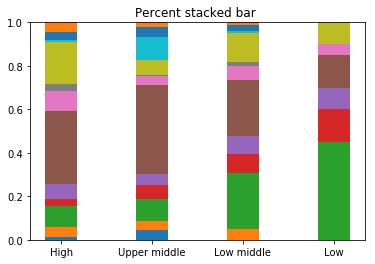

In [13]:

def plot_bar(labels, data):
    x = range(len(labels))
    width = 0.35
    bottom_y = np.zeros(len(labels))

    # 按列计算计算每组柱子的总和，为计算百分比做准备
    sums = np.sum(data, axis=1)
    for i in range( data.shape[1] ):
        sub_data = data[:,i]
        y = sub_data / sums
        plt.bar(x, y, width, bottom=bottom_y)
        bottom_y = y + bottom_y
    plt.xticks(x, labels)
    plt.title('Percent stacked bar ')
    plt.show()
    return 

plot_bar( labels , data = np.array(data), )

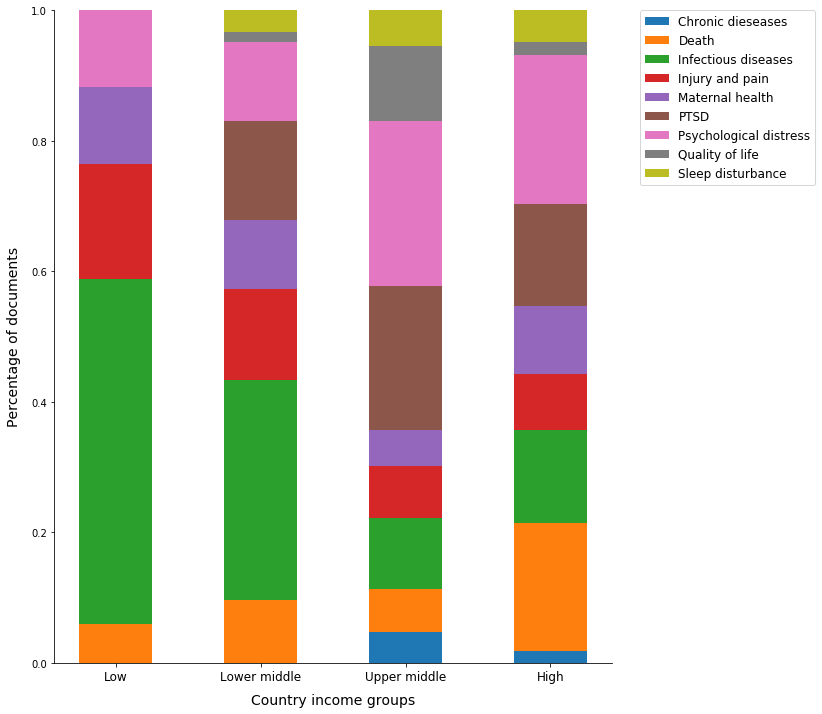

In [14]:
def survey(labels, data, category_names):
    #labels = list(results.keys())
    #data = np.array(list(results.values()))
    data = np.array(list(data))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 12))
    ax.invert_xaxis()
    # 使其更符合视觉习惯，index本身从下到上
    #ax.yaxis.set_visible(False)
    #ax.set_xticklabels(labels=labels, rotation=90)
    
    
    #SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    #BIGGER_SIZE = 12
    #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    #plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    #plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    #plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    #plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


    #plt.rcParams.update({'font.size': 20})
    ax.set_xticklabels(labels=labels, fontsize = 'large')
    #ax.set_yticklabels(labels= )
    fontsize=14
    ax.set_xlabel("Country income groups",  fontsize=fontsize, labelpad=10,)
    ax.set_ylabel("Percentage of documents", fontsize=fontsize, labelpad=10,)
    
    ax.set_ylim(0, np.sum(data, axis=1).max())
    
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        heights = data[:, i]
        starts = data_cum[:, i] - heights
        ax.bar(labels, heights, bottom=starts, width=0.5,
            label=colname, 
            #color=color,
              )
        xcenters = starts + heights / 2
        r, g, b, _ = color
        """
        #text_color = 'white' if r * g * b < 0.5 else 'black' #'darkgrey'
        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, heights)):
            ax.text(y, x, 
                    str(int(c*100)), 
                    ha='center', 
                    va='center',
                    color=text_color,) # rotation = 90)
        """
    ax.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., fontsize="large")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return fig, ax


def data_normalize(data):
    normalize_data = []
    for lst in data:
        sub = np.array(lst) / sum(lst)
        normalize_data.append( sub.tolist() )
    return normalize_data


survey( 
    labels, data_normalize(data),
    category_names=related_health_topics
    )


from matplotlib.backends.backend_pdf import PdfPages
file_path="/home/linyu.linyu/health.research/health/data/cls_output/figure_out/figure5.pdf"
plt.savefig(file_path,dpi=250,bbox_inches="tight")
## pp = PdfPages(file_path)
## pp.savefig(fig)
## pp.close()

plt.show()
